In [19]:
#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import math
from collections import Counter
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn.cluster import KMeans

## Variables originales:

In [3]:
data = pd.read_csv('data_set_cleaned.csv', header = 0, names=None)
data = data[data.Case1_Control0=='Positivo']
data.head()

,Case1_Control0,Edad,Genero,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,...,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
0,Positivo,79,M,0.803979,0.644524,1.327075,0.796338,2,0.335486,58.280750,...,0.312041,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666
1,Positivo,79,M,0.826989,0.633677,1.326004,0.823259,2,0.352115,57.346196,...,0.429035,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640
2,Positivo,79,M,0.789131,0.610778,1.219237,0.739892,2,0.359121,60.114133,...,0.405821,56.550877,1,1.059078,0.382493,0.811643,1.974094,2.121983,0.930306,0.438414
3,Positivo,68,M,1.193026,0.536687,1.263887,0.741654,2,0.476885,50.955888,...,0.435792,50.936203,1,1.085094,0.369960,0.871583,1.951583,2.355888,0.828385,0.351623
4,Positivo,68,M,1.045567,0.508093,1.061983,0.817604,2,0.446011,57.412502,...,0.358499,59.642470,1,1.189026,0.356362,0.716997,1.858186,2.011989,0.923557,0.459027


In [4]:
x = data.loc[: , ~data.columns.isin(['Case1_Control0','Genero'])]
x = x.values

y = data['Case1_Control0'].values

In [5]:
kmeans = KMeans(n_clusters=5, random_state=1234, n_init=10)
kmeans.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [6]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:n",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 5 iteraciones llegar a convergencia, con un WSS final de:n 15422.35803627967 y los centroides siguientes: [[58.52941176  0.80197772  0.52951726  1.15930745  0.63608795  2.70588235
   0.33897785 76.46555001  1.05882353  0.87808077  0.42866881  0.90732338
   1.92535859  2.15947494  0.94374824  0.49369517  0.78053734  0.55911709
   1.29653228  0.63299517  2.70588235  0.34499389 71.64112184  1.17647059
   1.06628497  0.40921624  0.91433745  1.91099847  2.28431991  0.86556506
   0.40667085]
 [71.9         0.86274746  0.57859412  1.72184547  0.64335932  2.73333333
   0.40808793 56.1573796   1.26666667  1.10244059  0.37679976  1.11898811
   1.92056041  2.9669174   0.73326561  0.30837743  0.85571743  0.57768435
   1.7490919   0.66497464  2.76666667  0.42117004 55.35820909  1.33333333
   1.10763783  0.38087003  1.19741318  1.93204781  3.06903962  0.72346447
   0.30086022]
 [65.9         0.80943205  0.54408521  1.15026807  0.57711263  2.9
   0.30785876 82.90810934  1.          1

In [7]:
clusters = kmeans.predict(x)
clusters

array([3, 1, 1, 1, 1, 2, 3, 2, 3, 3, 0, 2, 1, 1, 3, 3, 3, 0, 3, 1, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 3, 1, 3, 3, 1, 2, 0, 0, 0, 0, 0, 4,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 4, 4, 4, 1, 2, 3, 0, 2, 1, 1, 1, 1, 2, 1, 1, 4, 4, 0, 4,
       4, 0])

In [8]:
counter=Counter(clusters)
print(len(clusters))
counter

90


Counter({3: 12, 1: 30, 2: 20, 0: 17, 4: 11})

In [9]:
data.loc[:,'Cluster'] = clusters
data.head()

,Case1_Control0,Edad,Genero,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,...,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl,Cluster
0,Positivo,79,M,0.803979,0.644524,1.327075,0.796338,2,0.335486,58.280750,...,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666,3
1,Positivo,79,M,0.826989,0.633677,1.326004,0.823259,2,0.352115,57.346196,...,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640,1
2,Positivo,79,M,0.789131,0.610778,1.219237,0.739892,2,0.359121,60.114133,...,56.550877,1,1.059078,0.382493,0.811643,1.974094,2.121983,0.930306,0.438414,1
3,Positivo,68,M,1.193026,0.536687,1.263887,0.741654,2,0.476885,50.955888,...,50.936203,1,1.085094,0.369960,0.871583,1.951583,2.355888,0.828385,0.351623,1
4,Positivo,68,M,1.045567,0.508093,1.061983,0.817604,2,0.446011,57.412502,...,59.642470,1,1.189026,0.356362,0.716997,1.858186,2.011989,0.923557,0.459027,1


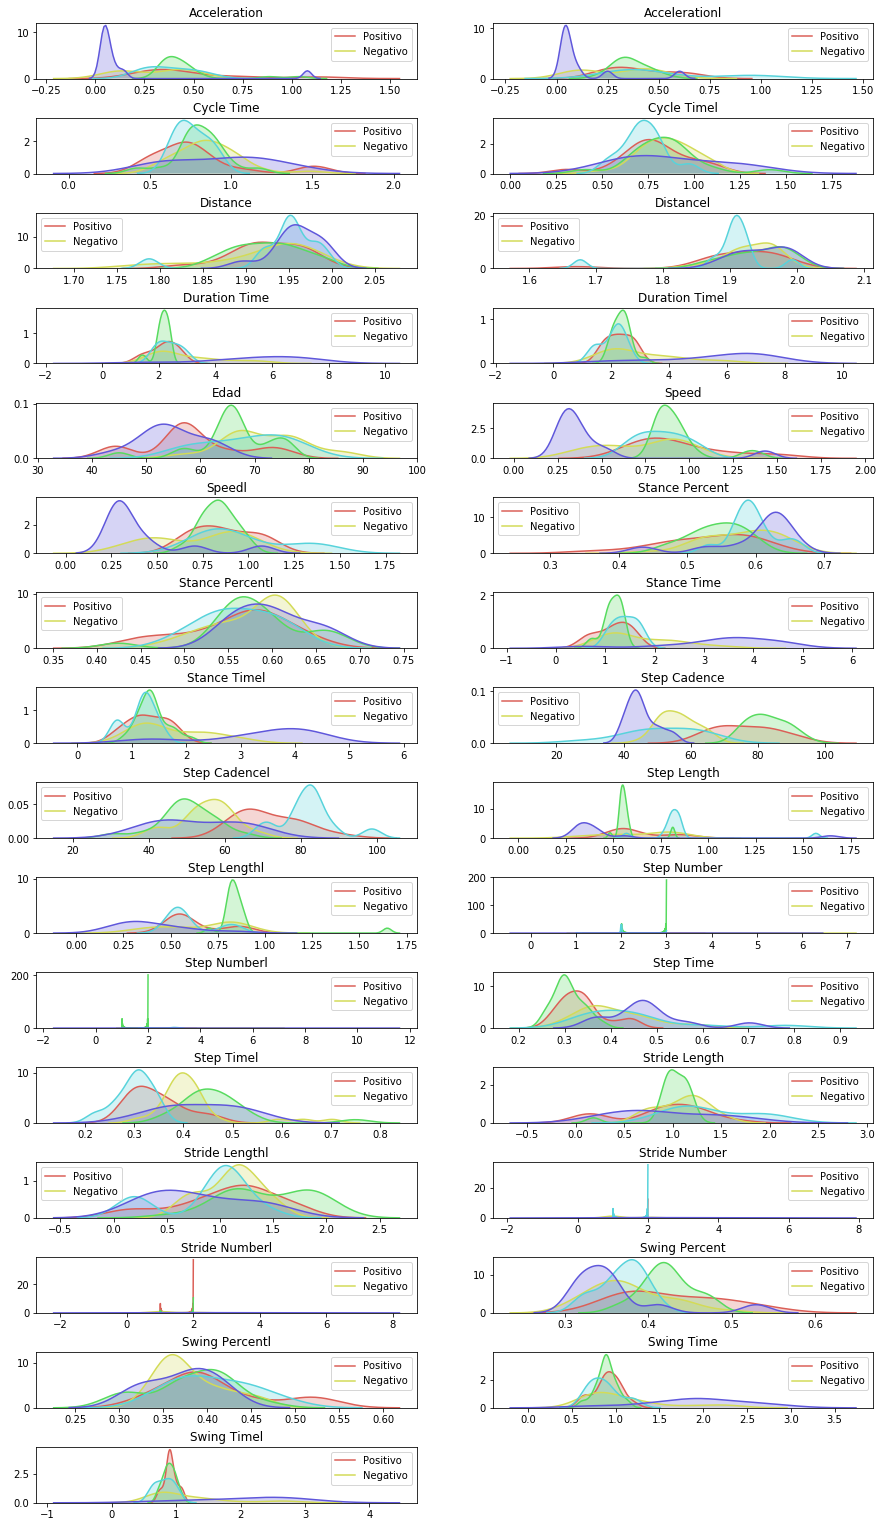

In [10]:
pk_var_num_uni = ['Edad','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration','Cycle Timel', 'Stance Percentl', 'Stance Timel', 'Step Lengthl',
       'Step Numberl', 'Step Timel', 'Step Cadencel', 'Stride Numberl',
       'Stride Lengthl', 'Swing Percentl', 'Swing Timel', 'Distancel',
       'Duration Timel', 'Speedl', 'Accelerationl']

pk_var_num_uni = np.sort(pk_var_num_uni)
fig = plt.figure(figsize=(15,25))
i = 1
for var_num in pk_var_num_uni:
    sns.set_palette("hls")
    ax = fig.add_subplot((len(pk_var_num_uni)/2)+2,2,i)
    sns.kdeplot(data.loc[data.Cluster==0][var_num], shade=True,  ax=ax);
    sns.kdeplot(data.loc[data.Cluster==1][var_num], shade=True,  ax=ax);
    sns.kdeplot(data.loc[data.Cluster==2][var_num], shade=True,  ax=ax);
    sns.kdeplot(data.loc[data.Cluster==3][var_num], shade=True,  ax=ax);
    sns.kdeplot(data.loc[data.Cluster==4][var_num], shade=True,  ax=ax);
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.7)
    plt.legend(['Positivo','Negativo'])
    i+=1

### Determinación del K (Variables originales)

#### Técnica del Codo:

In [11]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    WSSs.append(km.inertia_)
WSSs

[47871.88180724206,
 31029.609394362036,
 22252.68339163578,
 18504.13567136393,
 15391.741713575317,
 13265.51659791959,
 12236.569156768095,
 10780.916614303434,
 9694.791725952338,
 8933.224301388413,
 8397.031404472202,
 7372.62548622832,
 6749.432580221379,
 6305.074195182527]

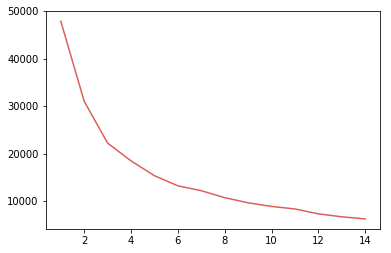

In [15]:
plt.plot(range(1,15),WSSs)

#### Silueta

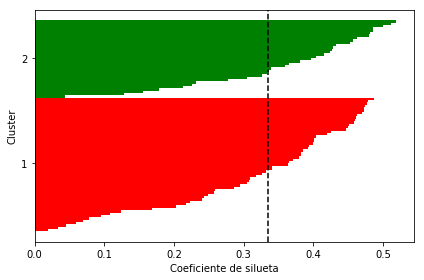

In [25]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

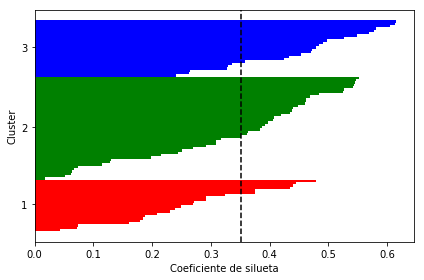

In [20]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

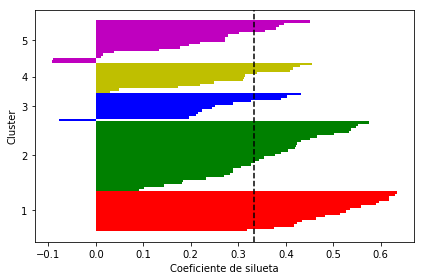

In [24]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

#### Calinski Harabaz

In [27]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    CH = calinski_harabaz_score(x, km.labels_) 
    CHs.append(CH)
CHs

[47.76469962921083,
 50.08093232916626,
 45.4966070385741,
 44.84242198409998,
 43.826935138567876,
 40.28540614743315,
 40.30215418902788,
 39.8712059010311,
 38.74540573197492,
 37.1382817522621,
 38.95173372880048,
 39.09499740466497,
 38.54133110427957]

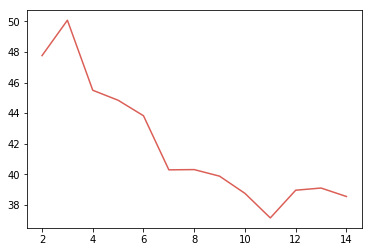

In [28]:
plt.plot(range(2,15), CHs)

Silueta y CH muestran que para K=3 se obtiene el mayor score y despues de 5 la métrica decae mucho.

## PCA

In [12]:
data_pca = pd.read_csv('data_set_pca.csv', header = 0, names=None)
idx_posi=data[data.Case1_Control0=='Positivo'].index

data_pca =  data_pca.loc[idx_posi,:]
x_pca = data_pca.values

data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-2.776297,-3.552713,-0.337127,-0.240502,-0.488268,-0.357979,-0.690824,0.409840,-0.433333,-1.853521,-0.467948
1,-1.029356,-0.358651,-0.497649,-1.646325,-0.174243,0.273092,-1.152717,0.396661,-0.159337,-1.653575,0.546119
2,-1.284946,0.261893,-0.981563,-1.674963,-0.891581,1.766912,-1.611825,-0.886463,0.351474,1.606582,1.825960
3,-0.006673,0.437140,0.837705,-1.440532,1.088074,0.581807,0.265314,-0.194801,-2.149082,0.335158,1.088585
4,-1.030385,0.937285,1.808254,-0.811581,0.653366,-0.604481,0.253954,1.318449,-1.033979,-0.023333,-0.179735


In [13]:
kmeans = KMeans(n_clusters=5, random_state=1234, n_init=10)
kmeans.fit(x_pca,y)
clusters = kmeans.predict(x_pca)

data_pca.loc[:, 'Cluster'] = clusters
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,Cluster
0,-2.776297,-3.552713,-0.337127,-0.240502,-0.488268,-0.357979,-0.690824,0.409840,-0.433333,-1.853521,-0.467948,2
1,-1.029356,-0.358651,-0.497649,-1.646325,-0.174243,0.273092,-1.152717,0.396661,-0.159337,-1.653575,0.546119,2
2,-1.284946,0.261893,-0.981563,-1.674963,-0.891581,1.766912,-1.611825,-0.886463,0.351474,1.606582,1.825960,3
3,-0.006673,0.437140,0.837705,-1.440532,1.088074,0.581807,0.265314,-0.194801,-2.149082,0.335158,1.088585,3
4,-1.030385,0.937285,1.808254,-0.811581,0.653366,-0.604481,0.253954,1.318449,-1.033979,-0.023333,-0.179735,3


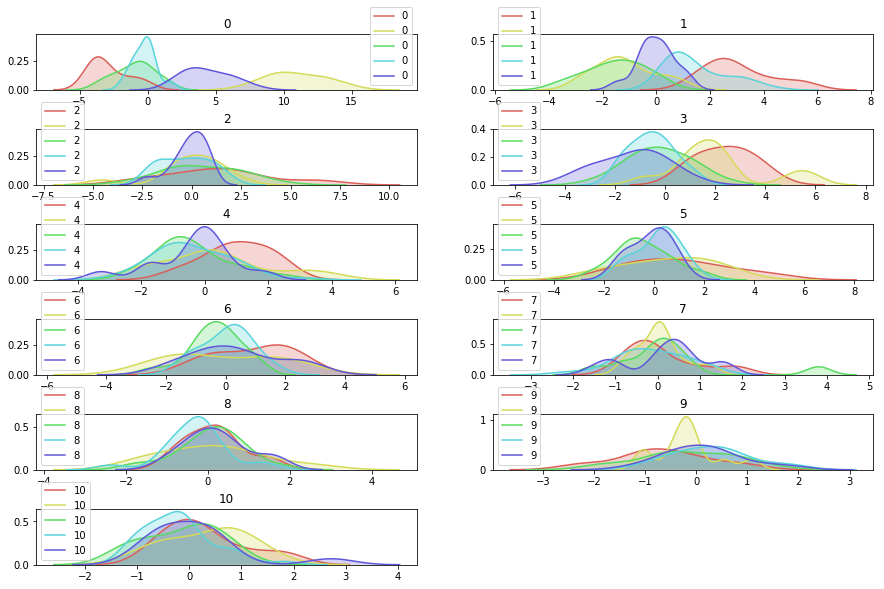

In [14]:
vec_var_num = ['0','1','2','3','4','5','6','7','8','9','10']

fig = plt.figure(figsize=(15,25))
i = 1
for var_num in vec_var_num:
    sns.set_palette("hls")
    ax = fig.add_subplot((len(pk_var_num_uni)/2)+2,2,i)
    sns.kdeplot(data_pca.loc[data_pca.Cluster==0][var_num], shade=True,  ax=ax);
    sns.kdeplot(data_pca.loc[data_pca.Cluster==1][var_num], shade=True,  ax=ax);
    sns.kdeplot(data_pca.loc[data_pca.Cluster==2][var_num], shade=True,  ax=ax);
    sns.kdeplot(data_pca.loc[data_pca.Cluster==3][var_num], shade=True,  ax=ax);
    sns.kdeplot(data_pca.loc[data_pca.Cluster==4][var_num], shade=True,  ax=ax);
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.7)
    i+=1


### Determinación del K (PCA)

#### Tecnica del codo:

In [29]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_pca)
    WSSs.append(km.inertia_)
WSSs

[3094.3202814247143,
 1784.9263278661215,
 1554.9467961609766,
 1368.8762242930788,
 1253.048270982616,
 1123.519218126065,
 1037.1835643205677,
 1003.8850189622851,
 936.2858977581407,
 905.0567446574213,
 856.6691641882553,
 773.8813086518569,
 780.7265110510109,
 710.3376714418002]

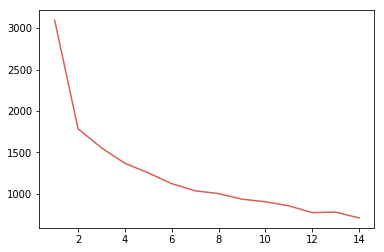

In [30]:
plt.plot(range(1,15),WSSs)

#### Silueta

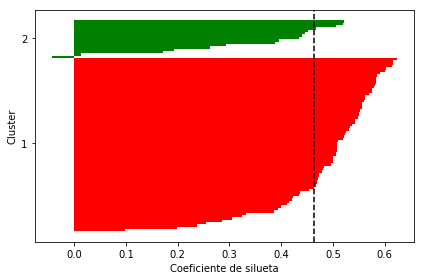

In [36]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

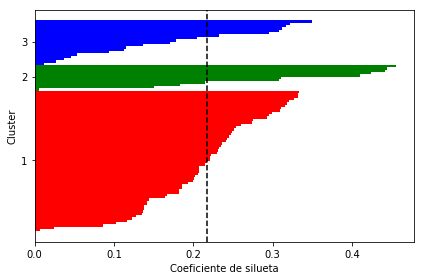

In [37]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

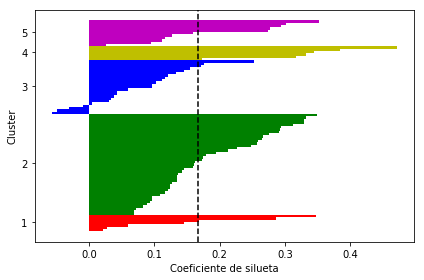

In [38]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(x_pca)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(x_pca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'm']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

#### Calinski-Harabaz

In [42]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_pca)
    CH = calinski_harabaz_score(x_pca, km.labels_) 
    CHs.append(CH)
CHs

[64.55541952306208,
 43.06433298830388,
 36.13382186056838,
 31.225477204650645,
 29.46941835017392,
 27.43685775485864,
 24.39318793402845,
 23.336993739777895,
 21.50154721424274,
 20.635088275785492,
 21.261686544153143,
 19.015058175211138,
 19.620427952563404]

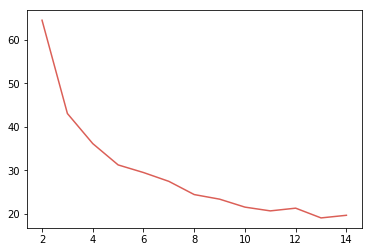

In [43]:
plt.plot(range(2,15), CHs)